In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 

# seed 값 설정
seed=0
numpy.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 불러오기
df = pd.read_csv('data/MatchTimelinesFirst15.csv')
df.head(10)

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0
5,5,3.494459e+09,1,25470.0,362.0,82.0,9.2,22856.0,319.0,86.0,8.8,9.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0
6,6,3.463321e+09,1,25391.0,350.0,96.0,9.2,23236.0,345.0,80.0,8.6,8.0,2.0,0.0,0.0,5.0,1.0,0.0,1.0
7,7,3.463280e+09,0,28946.0,367.0,65.0,9.2,26528.0,311.0,63.0,8.8,15.0,2.0,0.0,1.0,14.0,1.0,0.0,1.0
8,8,3.462719e+09,1,26928.0,379.0,80.0,9.6,23065.0,362.0,95.0,9.2,11.0,1.0,0.0,0.0,5.0,2.0,0.0,1.0
9,9,3.462734e+09,1,26079.0,302.0,106.0,9.0,27275.0,347.0,91.0,9.4,9.0,1.0,0.0,1.0,10.0,2.0,0.0,1.0


In [4]:
# 데이터 분석
df.info()
# blue_win을 제외한 모든 데이터가 float 타입
# blue_win은 class 이므로 모든 데이터는 float 타입이라고 볼 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               48651 non-null  int64  
 1   matchId                  48651 non-null  float64
 2   blue_win                 48651 non-null  int64  
 3   blueGold                 48651 non-null  float64
 4   blueMinionsKilled        48651 non-null  float64
 5   blueJungleMinionsKilled  48651 non-null  float64
 6   blueAvgLevel             48651 non-null  float64
 7   redGold                  48651 non-null  float64
 8   redMinionsKilled         48651 non-null  float64
 9   redJungleMinionsKilled   48651 non-null  float64
 10  redAvgLevel              48651 non-null  float64
 11  blueChampKills           48651 non-null  float64
 12  blueHeraldKills          48651 non-null  float64
 13  blueDragonKills          48651 non-null  float64
 14  blueTowersDestroyed   

In [5]:
df.describe()
#blueDragonKills와 redDragonKills는 모든 값이 0이기 때문에 의미없는 데이터임.
#matchId는 게임번호이고 Unnamed는 인덱스이므로 승부예측과는 관련없는 데이터임.

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
count,48651.00000,4.865100e+04,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.0,48651.000000,48651.000000,48651.000000,48651.0,48651.000000
mean,24325.00000,3.486083e+09,0.505416,26349.160572,335.859140,83.136585,9.172251,26203.028591,336.693984,84.692997,9.174759,11.013155,1.316355,0.0,0.794084,10.747693,1.287188,0.0,0.891657
std,14044.47831,2.812307e+07,0.499976,2777.299868,32.673096,14.794947,0.413735,2754.709425,33.278962,14.902326,0.421396,4.532898,0.956784,0.0,1.054556,4.453358,0.952450,0.0,1.111205
min,0.00000,2.544365e+09,0.000000,15930.000000,120.000000,0.000000,5.400000,11133.000000,14.000000,1.000000,2.400000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,12162.50000,3.475554e+09,0.000000,24401.500000,315.000000,73.000000,9.000000,24301.000000,316.000000,75.000000,9.000000,8.000000,1.000000,0.0,0.000000,8.000000,1.000000,0.0,0.000000
50%,24325.00000,3.494380e+09,1.000000,26167.000000,337.000000,83.000000,9.200000,26029.000000,338.000000,84.000000,9.200000,11.000000,1.000000,0.0,1.000000,10.000000,1.000000,0.0,1.000000
75%,36487.50000,3.506802e+09,1.000000,28126.000000,358.000000,92.000000,9.400000,27940.000000,359.000000,94.000000,9.400000,14.000000,2.000000,0.0,1.000000,14.000000,2.000000,0.0,1.000000
max,48650.00000,3.513125e+09,1.000000,39769.000000,455.000000,164.000000,10.800000,39999.000000,457.000000,160.000000,10.600000,50.000000,4.000000,0.0,11.000000,43.000000,4.000000,0.0,10.000000


In [6]:
df.corr()
#blue_win과 상관관계가 0.5 이상인 blueGold, redGold를 우선이용해 예측
#그 다음 순서대로 낮은 컬럼들을 하나씩 추가해 정확도 비교

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
Unnamed: 0,1.000000,-0.005593,0.009575,-0.045294,-0.095744,-0.043046,-0.015457,-0.064630,-0.118526,-0.057461,-0.032681,-0.001215,-0.004307,NaN,-0.030934,-0.014944,-0.024882,NaN,-0.015488
matchId,-0.005593,1.000000,0.001504,0.012591,-0.021511,0.021781,0.012909,0.008224,-0.026338,0.022355,0.013529,0.024730,0.000318,NaN,-0.017694,0.025511,-0.000462,NaN,-0.012225
blue_win,0.009575,0.001504,1.000000,0.521364,0.284272,0.246505,0.457024,-0.519554,-0.300026,-0.267774,-0.458572,0.424738,0.391925,NaN,-0.387619,-0.418306,-0.396969,NaN,0.389624
blueGold,-0.045294,0.012591,0.521364,1.000000,0.346955,0.299570,0.703495,-0.456804,-0.495301,-0.363318,-0.525359,0.865140,0.450115,NaN,-0.460574,-0.258176,-0.432055,NaN,0.711208
blueMinionsKilled,-0.095744,-0.021511,0.284272,0.346955,1.000000,0.281259,0.561064,-0.486606,0.035158,-0.023374,-0.176940,0.017363,0.196358,NaN,-0.422873,-0.515020,-0.185863,NaN,0.264474
blueJungleMinionsKilled,-0.043046,0.021781,0.246505,0.299570,0.281259,1.000000,0.475889,-0.344069,-0.018286,-0.209181,-0.199804,0.069145,0.317968,NaN,-0.260696,-0.334563,-0.259751,NaN,0.220252
blueAvgLevel,-0.015457,0.012909,0.457024,0.703495,0.561064,0.475889,1.000000,-0.519865,-0.188483,-0.212622,-0.319492,0.539841,0.351571,NaN,-0.512570,-0.445715,-0.347737,NaN,0.399790
redGold,-0.064630,0.008224,-0.519554,-0.456804,-0.486606,-0.344069,-0.519865,1.000000,0.368973,0.319473,0.706237,-0.261095,-0.426647,NaN,0.700076,0.865389,0.453199,NaN,-0.471831
redMinionsKilled,-0.118526,-0.026338,-0.300026,-0.495301,0.035158,-0.018286,-0.188483,0.368973,1.000000,0.296705,0.572012,-0.519074,-0.196499,NaN,0.271587,0.037182,0.217338,NaN,-0.441944
redJungleMinionsKilled,-0.057461,0.022355,-0.267774,-0.363318,-0.023374,-0.209181,-0.212622,0.319473,0.296705,1.000000,0.500910,-0.349442,-0.280140,NaN,0.221266,0.085537,0.338895,NaN,-0.290675


In [7]:
#입력 데이터는 blueGold와 redGold
#결과는 blue_win blue 팀이 이기면 1, blue 팀이 지면 0
X = df.iloc[:,[3,7]]
Y = df.iloc[:,2]

In [8]:
#훈련셋과 테스트셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

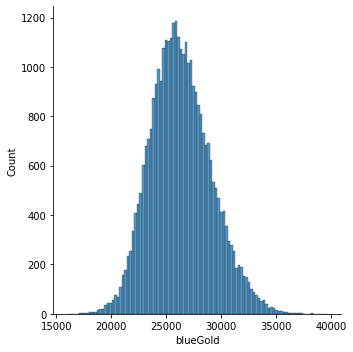

In [10]:
sns.displot(X_train['blueGold'])

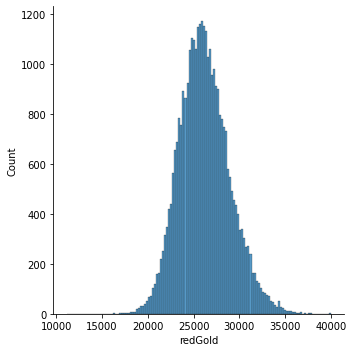

In [11]:
sns.displot(X_train['redGold'])

In [18]:
#blueGold와 redGold를 예측하기 쉽게 0과 1사이의 값으로 바꿔줌
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
#모델 프레임 생성
#임의로 32개의 노드를 가진 은닉층 추가
#테스트 후 조정 예정
#binary classfication이므로 sigmoid 사용
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs = 30, batch_size=20)
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
34055/34055 [==============================] - 2s 61us/step - loss: 0.5369 - accuracy: 0.7674
Epoch 2/30
34055/34055 [==============================] - 2s 55us/step - loss: 0.4588 - accuracy: 0.7772
Epoch 3/30
34055/34055 [==============================] - 2s 55us/step - loss: 0.4553 - accuracy: 0.7781
Epoch 4/30
34055/34055 [==============================] - 2s 59us/step - loss: 0.4543 - accuracy: 0.7783
Epoch 5/30
34055/34055 [==============================] - 2s 55us/step - loss: 0.4539 - accuracy: 0.7781
Epoch 6/30
34055/34055 [==============================] - 2s 56us/step - loss: 0.4540 - accuracy: 0.7770
Epoch 7/30
34055/34055 [==============================] - 2s 57us/step - loss: 0.4537 - accuracy: 0.7773
Epoch 8/30
34055/34055 [==============================] - 2s 55us/step - loss: 0.4536 - accuracy: 0.7782
Epoch 9/30
34055/34055 [==============================] - 2s 55us/step - loss: 0.4534 - accuracy: 0.7785
Epoch 10/30
34055/34055 [==============================